In [1]:
import numpy as np
import scipy

from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn.cluster import KMeans

# Практическое задание 4
## Вариант 7

## Задание 1 

Дан набор точек **D**:

|      | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|**x**|-25.2|-45|-43.7|-40.9|-42.3|-18.9|-30.7|-31.2|-25.4|-42|
|**y**|35.1|32.2|29.2|29.9|31.6|41.3|34.1|34.4|37.8|32.8|

Количество кластеров k = **2**

Начальные средние значения (центры кластеров) M = **[(-32, 39), (-45, 24)]**

Порог сходимости ε = **0.01**

1.1 *Самостоятельно* реализуйте алгоритм **KMeans** для двумерных данных. Вычислите кластеры и их центры. 

Оформите этот пункт в виде функции. Функция должна возвращать найденные кластеры и новые центры кластеров. Каждый кластер должен содержать индексы точек, которые принадлежат этому кластеру

1.2 Постройте диаграмму рассеяния, на которой будут отображены все точки, их принадлежность кластеру, центры кластеров. 

Оформите этот пункт в виде функции. Принадлежность кластеру отобразить цветом точки. Все точки подписать. Точки центров кластеров выделить

1.3 Воспользуйтесь алгоритмом **KMeans** из библиотеки **sklearn** и выведите результат его работы. Сравните результаты собственной и библиотечной реализации

1.4 К исходным данным добавьте точку **(10, -17)** и повторно вычислите кластеры и их центры. Также постройте диаграмму рассеяния

### Данные

In [2]:
# Набор точек
D = [(-25.2, 35.1), (-45,   32.2), (-40.9, 29.9),
     (-42.3, 31.6), (-18.9, 41.3), (-30.7, 34.1),
     (-31.2, 34.4), (-25.4, 37.8), (-42,   32.8)]

# Количество кластеров
k = 2

# Начальные кластеры
M = [(-32, 39), (-45, 24)]

# Порог сходимости
epsil = 0.01

### Пункт 1.1

In [3]:
# Функция рассчета расстояния между точками
# A, B - точки
# return:
# float - расстояние между точками 
def dist_points(A, B):
    return ((A[0] - B[0])**2 + (A[1] - B[1])**2)**(1/2)

# Функция для работы алгоритма Kmeans
# points - набор всех точек
# clusters - начальные центры кластеров
# epsilon - насколько будут происходить различия между k и k+1 итерацией
# return:
# list(list(int)) - разбитие на кластеры содержащие индексы точек
# list(list[2 * float]) - центры кластеров
def KMeans_m(points, clusters, epsilon = 0.01):
    # Результирующие разбитие индексов точек на кластеры
    clustersWithId = []
    # Результирующие разбитие индексов точек на кластеры
    prev_cluters = clusters.copy()
    # Счетчик на бесконечный цикл
    cnt = 0
    
    while True:
        # Проверка на бесконечный цикл
        # Необязательный код, подстороенный под пример с небольшим количеством точек
        cnt += 1
        if cnt > 100000:
            print("ОШИБКА!!!")
            break
        
        # Инициализация новых центров кластеров
        new_clusters = [(0, 0)] * len(clusters)
        # Очистка кластеров с индексами точек
        clustersWithId = [[] for i in range(len(clusters))]
        
        # Пересчет новых кластеров
        for i, point in enumerate(points):
            # Получение id кластера, который ближе всего к точке
            id_cluster = np.argmin([dist_points(point, clst) for clst in prev_cluters])
            
            # перерасчет новых кластеров
            new_clusters[id_cluster] = (new_clusters[id_cluster][0] + point[0], 
                                        new_clusters[id_cluster][1] + point[1])
            
            # Добавление id точки к кластеру
            clustersWithId[id_cluster].append(i)
            
        # продолжение перерасчета новых кластеров
        for i, cluster in enumerate(new_clusters):
            new_clusters[i] = (cluster[0] / len(clustersWithId[i]),
                               cluster[1] / len(clustersWithId[i]))
        
        # Рассчет суммы расстояний между 
        sum = 0
        for i, clst in enumerate(new_clusters):
            sum += dist_points(clst, prev_cluters[i])
        
        # Условие выхода из цикла
        if sum < epsilon:
            print("Итог")
            print("Сумма расстояние между точками центров кластеров:", sum)
            print("Центры кластеров:", new_clusters)
            for i, elem in enumerate(clustersWithId):
                print("Id точек для кластера №", i)
                print(elem)
            break
        
        print("Итерация №", cnt)
        print("Сумма расстояние между точками центров кластеров:", sum)
        print("Новые центры кластеров:", new_clusters)
        for i, elem in enumerate(clustersWithId):
            print("Id точек для кластера №", i)
            print(elem)
        # Копируем получившиеся кластеры в предыдущие и производим перерасчет
        prev_cluters = new_clusters.copy()
    return clustersWithId, new_clusters

In [4]:
#Вызов функции под наши данные
ids, new_M = KMeans_m(D, M, epsil)


Итерация № 1
Сумма расстояние между точками центров кластеров: 14.235496347344075
Новые центры кластеров: [(-26.28, 36.54), (-42.55, 31.625)]
Id точек для кластера № 0
[0, 4, 5, 6, 7]
Id точек для кластера № 1
[1, 2, 3, 8]
Итог
Сумма расстояние между точками центров кластеров: 0.0
Центры кластеров: [(-26.28, 36.54), (-42.55, 31.625)]
Id точек для кластера № 0
[0, 4, 5, 6, 7]
Id точек для кластера № 1
[1, 2, 3, 8]


### Пункт 1.2

In [5]:
# Функция для вывода диаграммы рассеивания для алгоритма Kmeans
# Плюсами помечаются центры кластеров
# clusters - центры кластеров
# clustersWithId - разбитие на кластеры содержащие индексы точек
# points - набор всех точек
# colors - набор цветов для кластеров
def diagramm(clusters, clustersWithId, points, colors):
    # Вывод точек на график
    for i, cluster in enumerate(clustersWithId):
        x_val  = [points[idc][0] for idc in cluster]
        y_val  = [points[idc][1] for idc in cluster]

        plt.scatter(x_val, y_val, c = colors[i])
        # Вывод центра класстеров
        plt.plot(clusters[i][0], clusters[i][1], c = colors[i], marker = '+', markersize = 20)
    
    # Нумеруем каждую точку на диаграмме
    cnt = 0
    for x, y in points:
        plt.text(x, y, cnt)
        cnt = cnt + 1
    # Добавление сетки    
    plt.grid()
    # Подпись осей
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

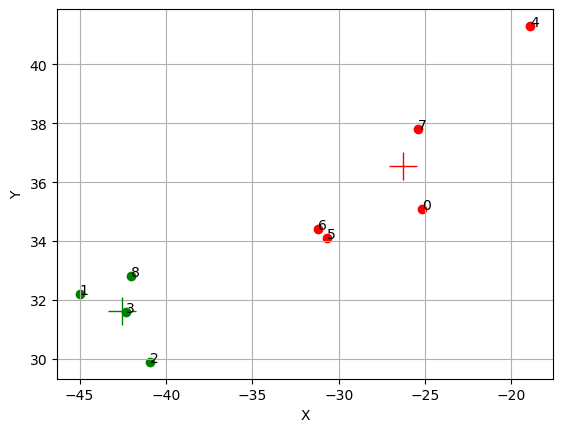

In [6]:
# Вызов функции для вывода диаграммы
diagramm(new_M, ids, D, ['r', 'g'])

### Пункт 1.3

In [7]:
# Вызов библитечной функции для вывода диаграммы
kmeans = KMeans(n_clusters=len(new_M), random_state=0).fit(D)

print("Принадлежность точки к кластеру:", kmeans.labels_)

#Переведем в вид, который был дан по заданию
ids_lib = [[] for i in range(len(new_M))]
for i in range(len(kmeans.labels_)):
    ids_lib[kmeans.labels_[i]].append(i)

for i, elem in enumerate(ids_lib):
    print("Id точек для кластера №", i)
    print("lib:", elem)
    print("my :", ids[i])
print("Центры кластеров в библиотечной функции:", kmeans.cluster_centers_,
      "Центры кластеров в моей функции:", new_M, sep = '\n')


Принадлежность точки к кластеру: [0 1 1 1 0 0 0 0 1]
Id точек для кластера № 0
lib: [0, 4, 5, 6, 7]
my : [0, 4, 5, 6, 7]
Id точек для кластера № 1
lib: [1, 2, 3, 8]
my : [1, 2, 3, 8]
Центры кластеров в библиотечной функции:
[[-26.28   36.54 ]
 [-42.55   31.625]]
Центры кластеров в моей функции:
[(-26.28, 36.54), (-42.55, 31.625)]


#### Сравнение:
Результат билиотечной реализации совпал с результатом, получившимся при собственной реализации.

### Пункт 1.4

Итерация № 1
Сумма расстояние между точками центров кластеров: 19.3555925525752
Новые центры кластеров: [(-26.28, 36.54), (-32.04, 21.9)]
Id точек для кластера № 0
[0, 4, 5, 6, 7]
Id точек для кластера № 1
[1, 2, 3, 8, 9]
Итог
Сумма расстояние между точками центров кластеров: 0.0
Центры кластеров: [(-26.28, 36.54), (-32.04, 21.9)]
Id точек для кластера № 0
[0, 4, 5, 6, 7]
Id точек для кластера № 1
[1, 2, 3, 8, 9]


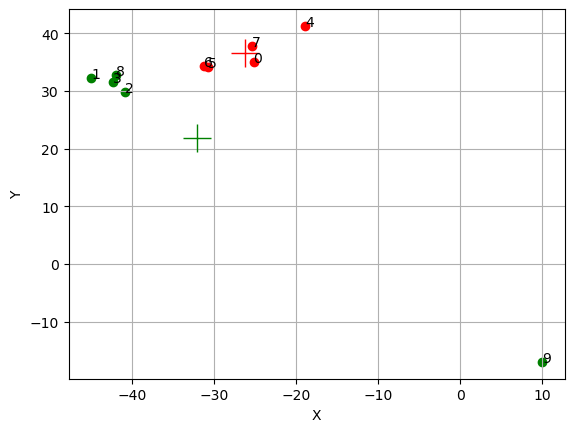

In [8]:
#Добавим новую точку и проведем еще раз алгоритм Kmeans
D_new = [(-25.2, 35.1), (-45,   32.2), (-40.9, 29.9),
         (-42.3, 31.6), (-18.9, 41.3), (-30.7, 34.1),
         (-31.2, 34.4), (-25.4, 37.8), (-42,   32.8),
         (10, -17)]

ids_n, new_M_n = KMeans_m(D_new, M, epsil)
diagramm(new_M_n, ids_n, D_new, ['r', 'g'])


## Задание 2

Дан набор значений **X** и вероятностей их принадлежности к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*:

| *x*  | *P(C<sub>1</sub>\|x)* | *P(C<sub>2</sub>\|x)* |
| ---- | --------------------- | --------------------- |
|7|0|1|
|6.9|0|1|
|4.4|0|1|
|19.7|0.7|0.3|
|19.2|0.8|0.2|
|14.8|0.9|0.1|
|20.4|0.5|0.5|
|10.3|0|1|
|7.7|0|1|
|15.2|0.9|0.1|

2.1 Найдите оценку максимального правдоподобия для средних μ<sub>1</sub> и μ<sub>2</sub>

2.2 Пусть μ<sub>1</sub> = **16**, μ<sub>2</sub> = **9.4** и σ<sub>1</sub> = **1.5**, σ<sub>2</sub> = **4.5**. Априорные вероятности каждого кластера P(*C<sub>1</sub>*) = **0.6**, P(*C<sub>2</sub>*) = **0.4**.

Найдите вероятности принадлежности точки x = **14.3** к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*

### Данные

In [9]:
# Набор значений
X =  np.array([7, 6.9, 4.4, 19.7, 19.2, 14.8, 20.4, 10.3, 7.7, 15.2])
# вероятность принадлежности к первому кластеру
C1 = np.array([0, 0  , 0  , 0.7 , 0.8 , 0.9 , 0.5,  0   , 0  , 0.9])
# вероятность принадлежности ко второму кластеру
C2 = 1 - C1

# Коэффициенты нормальных распределений
mu_1 = 16
mu_2 = 9.4
sko_1 = 1.5
sko_2 = 4.5
# Априорные вероятности
P_C1 = 0.6
P_C2 = 0.4

# Новая точка
x_2 = 14.3


### Пункт 2.1

In [10]:
# Рассчет оценки максимального правдоподобия
mu_1_m = sum((X * C1))/sum(C1)
mu_2_m = sum((X * C2))/sum(C2)

print("Оценка максимального правдоподобия для среднего μ1:", mu_1_m)
print("Оценка максимального правдоподобия для среднего μ2:", mu_2_m)

Оценка максимального правдоподобия для среднего μ1: 17.460526315789473
Оценка максимального правдоподобия для среднего μ2: 9.556451612903228


### Пункт 2.2

In [11]:
# Формула полной вероятности
sum = stats.norm.pdf(x_2, mu_1, sko_1) * P_C1 + stats.norm.pdf(x_2, mu_2, sko_2) * P_C2

# Используется формула Байеса
C1_x_2 = stats.norm.pdf(x_2, mu_1, sko_1) * P_C1 / sum
C2_x_2 = stats.norm.pdf(x_2, mu_2, sko_2) * P_C2 / sum

print("Вероятность принадлежности точки к кластеру C1:", C1_x_2)
print("Вероятность принадлежности точки к кластеру C2:", C2_x_2)

Вероятность принадлежности точки к кластеру C1: 0.8107198986026896
Вероятность принадлежности точки к кластеру C2: 0.18928010139731039


## Задание 3

Метод одиночной связи с метрикой RCДаны категориальные данные размерности 5:

|           | *X<sub>1</sub>* | *X<sub>2</sub>* | *X<sub>3</sub>* | *X<sub>4</sub>* | *X<sub>5</sub>* |
| --------------- | -------- | --------------- | --------------- | --------------- | --------------- |
|**x<sub>0</sub>**|1|1|1|1|1|
|**x<sub>1</sub>**|1|0|1|1|0|
|**x<sub>2</sub>**|0|1|0|1|0|
|**x<sub>3</sub>**|0|0|0|0|0|
|**x<sub>4</sub>**|0|0|1|1|0|
|**x<sub>5</sub>**|0|1|0|0|0|

Близость двух наблюдений определяется через количество совпадений и несовпадений значений признаков. Допустим, что n<sub>11</sub> это количество признаков, одновременной равных 1 для наблюдений x<sub>i</sub> и x<sub>j</sub>, и n<sub>10</sub> это количество признаков, равных 1 для наблюдения x<sub>i</sub> и в то же время равных 0 для наблюдения x<sub>j</sub>. По аналогии определяются n<sub>01</sub> и n<sub>00</sub>:

| x<sub>i</sub> \ x<sub>j</sub> |       1        |       0        |
| :---------------------------: | :------------: | :------------: |
|               1               | n<sub>11</sub> | n<sub>10</sub> |
|               0               | n<sub>01</sub> | n<sub>00</sub> |

Даны следующие метрики:

- Коэффициент простого совпадения
  $$
  SMC({\bf x}_i,{\bf x}_j)= \frac{n_{11}+n_{00}}{n_{11}+n_{10}+n_{01}+n_{00}}
  $$
  
- Коэффициент Жаккара
  $$
  JC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}}
  $$

- Коэффициент Рассела и Рао
  $$
  RC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}+n_{00}}
  $$

*Самостоятельно* реализуйте алгоритм **AgglomerativeClustering** (агломеративная иерархическая кластеризация). В качестве результата выведите список кластеров, возникающих на каждом шаге работы алгоритма.

Выполните иерархическую кластеризации и постройте дендрограммы по результатам кластеризации для следующих параметров алгоритма:

3.1 Метод одиночной связи с метрикой **RC**

3.2 Метод полной связи с метрикой **SMC**

3.3 Метод средней связи с метрикой **JC**

На дендрограммах подпишите точки (по оси x) и уровни (по оси y)

### Данные

In [40]:
# Категориальные данные
X_matr = ([[1, 1, 1, 1, 1],
           [1, 0, 1, 1, 0],
           [0, 1, 0, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, 1, 0],
           [0, 1, 0, 0, 0]])

### Функции для рассчета матрицы расстояний для разных метрик

In [57]:
# Функция для рассчета метрики с помощью Рассела и Рао
# u, v - точки, между которыми будет рассчитываться расстояние
# return:
# float - расстояние между точками (не схожесть)
def f_rc(u, v):
    up = 0
    low = 0
    for k in range(len(u)):
        if (u[k] == v[k] and u[k] == 1):
            up += 1
        low += 1
    return 1 - up / low

# Функция для рассчета метрики с помощью простого совпадения
# u, v - точки, между которыми будет рассчитываться расстояние
# return:
# float - расстояние между точками (не схожесть)
def f_smc(u, v):
    up = 0
    low = 0
    for k in range(len(u)):
        if (u[k] == v[k]):
            up += 1
        low += 1
    return 1 - up / low

# Функция для рассчета метрики с помощью Жаккара
# u, v - точки, между которыми будет рассчитываться расстояние
# return:
# float - расстояние между точками (не схожесть)
def f_jc(u, v):
    up = 0
    low = 0
    for k in range(len(u)):
        if (u[k] == v[k] and u[k] == 0):
            continue
        if (u[k] == v[k]):
            up += 1
        low += 1
    if low == 0:
        return 1.
    return 1 - up / low

# Функция для рассчета матрицы расстояний между наблюдениями
# matr_in - матрица с категориальными данными
# f_metr - функция для рассчета метрики между двумя наблюдениями
# return:
# list(list()) - Матрицу n * n наблюдений с рассчитаными расстояниями (Симметричная матрица с нулевой диагональю)
def dist_metr(matr_in, f_metr):
    # Инициализация матрицы расстояний
    matr_out = [[0. for col in range(len(matr_in))] for row in range(len(matr_in))]
    # Проход по всем парам
    for i in range(len(matr_in)):
        for j in range(i + 1, len(matr_in)):
            matr_out[i][j] = f_metr(matr_in[i], matr_in[j])
            matr_out[j][i] = matr_out[i][j]
    return matr_out

# Функция для обновления матрицы расстояний между кластерами
# matr_dist - матрица расстояний
# elem_1, elem_2 - индексы объединяющихся кластеров
# method - функция для метода рассчета расстояний между кластерами
# recalc_method - функция для перепасчета чего-нибудь в методе (используется для метода средней связи)
# string - название метода (используется для метода средней связи)
# return:
# list(list()) - Матрицу m * m с перерассчитанными расстояниями (Симметричная матрица с нулевой диагональю)
def recalc_dist(matr_dist, elem_1, elem_2, method, recalc_method = lambda elem_1, elem_2: None, string = None):
    # инициализация новой матрицы
    new_matr = matr_dist.copy()
    # Цикл для перерасчета расстояний между кластерами (между объединенным кластром и остальными)
    for i in range(len(matr_dist)):
        if i != elem_2 or i != elem_1:
            # Проверка на метод средней связи
            if string == "average":
                new_matr[elem_1][i] = method(matr_dist[elem_1][i], matr_dist[elem_2][i], elem_1, elem_2)
                new_matr[i][elem_1] = matr_dist[elem_1][i]
            else:
                new_matr[elem_1][i] = method(matr_dist[elem_1][i], matr_dist[elem_2][i])
                new_matr[i][elem_1] = matr_dist[elem_1][i]
    
    # Удаление лишнего кластера из матрицы расстояний
    for i in range(len(new_matr)):
        new_matr[i].pop(elem_2)
    new_matr.pop(elem_2)
    
    # Вызов на перерасчет для метода (специально для средней связи)
    recalc_method(elem_1, elem_2)
    
    return new_matr

In [58]:
# Пример рассчета матрицы расстояний для разных метрик
dist_smc = dist_metr(X_matr, f_smc)
dist_jc = dist_metr(X_matr, f_jc)
dist_rc = dist_metr(X_matr, f_rc)

print("Матрица расстояний SMC:")
for elem in dist_smc:
    print(elem)
print()

print("Матрица расстояний RC:")
for elem in dist_rc:
    print(elem)
print()

print("Матрица расстояний JC:")
for elem in dist_jc:
    print(elem)
print()

Матрица расстояний SMC:
[0.0, 0.4, 0.6, 1.0, 0.6, 0.8]
[0.4, 0.0, 0.6, 0.6, 0.19999999999999996, 0.8]
[0.6, 0.6, 0.0, 0.4, 0.4, 0.19999999999999996]
[1.0, 0.6, 0.4, 0.0, 0.4, 0.19999999999999996]
[0.6, 0.19999999999999996, 0.4, 0.4, 0.0, 0.6]
[0.8, 0.8, 0.19999999999999996, 0.19999999999999996, 0.6, 0.0]

Матрица расстояний RC:
[0.0, 0.4, 0.6, 1.0, 0.6, 0.8]
[0.4, 0.0, 0.8, 1.0, 0.6, 1.0]
[0.6, 0.8, 0.0, 1.0, 0.8, 0.8]
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
[0.6, 0.6, 0.8, 1.0, 0.0, 1.0]
[0.8, 1.0, 0.8, 1.0, 1.0, 0.0]

Матрица расстояний JC:
[0.0, 0.4, 0.6, 1.0, 0.6, 0.8]
[0.4, 0.0, 0.75, 1.0, 0.33333333333333337, 1.0]
[0.6, 0.75, 0.0, 1.0, 0.6666666666666667, 0.5]
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
[0.6, 0.33333333333333337, 0.6666666666666667, 1.0, 0.0, 1.0]
[0.8, 1.0, 0.5, 1.0, 1.0, 0.0]



In [59]:
# Функция для работы с алгоритмом agglomerative
# matr - матрица с категориальными данными
# f_metr - функция для рассчета метрики между 2 наблюдениями
# method - функция для метода рассчета расстояний между двумя кластерами
# recalc_method - функция для перепасчета чего-нибудь в методе (используется для метода средней связи)
# string - название метода (используется для метода средней связи)
def Agglomerative(matr, f_metr, method, recalc_method = lambda elem_1, elem_2: None, string = None):    
    # Инициализация начальных кластеров
    cluster = [[num for i in range(1)] for num in range(len(matr))]
    # Рассчет матрицы расттояний
    dist = dist_metr(matr, f_metr)
    # Количество кластеров
    k = len(matr)
    while k != 1:
        # Инициализация индексов кластеров с минимальным расстоянием
        min_i = 0
        min_j = 1
        # Поиск индексов кластеров с минимальным расстоянием
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                if (dist[i][j] < dist[min_i][min_j]):
                    min_i = i
                    min_j = j
        # Объединение пары кластеров
        for elem in cluster[min_j]:
            cluster[min_i].append(elem)
        # Сортировка элементов кластера
        cluster[min_i].sort()
        # Удаление лишнего кластера
        cluster.pop(min_j)
        # Обновление матрицы расстояний между кластерами
        dist = recalc_dist(dist, min_i, min_j, method, recalc_method, string)
        # Уменьшение количества кластеров
        k -= 1
        print(min_i, min_j)
        print("Кластеры:")
        print(cluster)
        print("Матрица расстояний для кластеров:")
        for elem in dist:
            print(elem)
        print() 

### Пункт 3.1

In [60]:
# Метод одиночной связи с метрикой RC
Agglomerative(X_matr, f_rc, min)    

0 1
Кластеры:
[[0, 1], [2], [3], [4], [5]]
Матрица расстояний для кластеров:
[0.0, 0.6, 1.0, 0.6, 0.8]
[0.6, 0.0, 1.0, 0.8, 0.8]
[1.0, 1.0, 0.0, 1.0, 1.0]
[0.6, 0.8, 1.0, 0.0, 1.0]
[0.8, 0.8, 1.0, 1.0, 0.0]

0 1
Кластеры:
[[0, 1, 2], [3], [4], [5]]
Матрица расстояний для кластеров:
[0.0, 1.0, 0.6, 0.8]
[1.0, 0.0, 1.0, 1.0]
[0.6, 1.0, 0.0, 1.0]
[0.8, 1.0, 1.0, 0.0]

0 2
Кластеры:
[[0, 1, 2, 4], [3], [5]]
Матрица расстояний для кластеров:
[0.0, 1.0, 0.8]
[1.0, 0.0, 1.0]
[0.8, 1.0, 0.0]

0 2
Кластеры:
[[0, 1, 2, 4, 5], [3]]
Матрица расстояний для кластеров:
[0.0, 1.0]
[1.0, 0.0]

0 1
Кластеры:
[[0, 1, 2, 3, 4, 5]]
Матрица расстояний для кластеров:
[0.0]



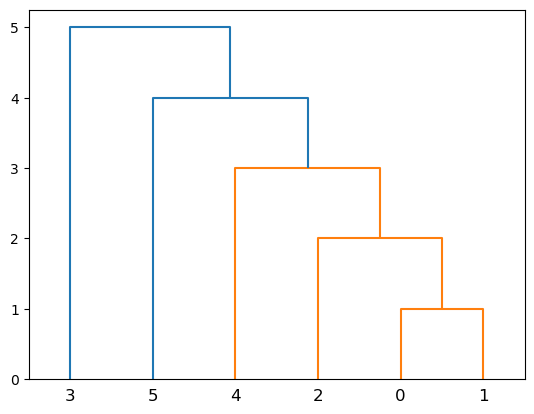

In [45]:
# Массив расстояний (верхний треугольник расстояний разложенный в массив)
a = pdist(X_matr, lambda u, v: f_rc(u, v))
# Библиотечный рассчет метода одиночной связи для получения нужной матрицы
Z = hierarchy.linkage(a, 'single')
# запись значения y для дендрограммы
for i, elem in enumerate(Z):
    elem[2] = i + 1
# Вывод дендрограммы
plt.figure()
dn = hierarchy.dendrogram(Z)  

### Пункт 3.2

In [61]:
# Метод полной связи с метрикой SMC
Agglomerative(X_matr, f_smc, max)

1 4
Кластеры:
[[0], [1, 4], [2], [3], [5]]
Матрица расстояний для кластеров:
[0.0, 0.6, 0.6, 1.0, 0.8]
[0.6, 0.19999999999999996, 0.6, 0.6, 0.8]
[0.6, 0.6, 0.0, 0.4, 0.19999999999999996]
[1.0, 0.6, 0.4, 0.0, 0.19999999999999996]
[0.8, 0.8, 0.19999999999999996, 0.19999999999999996, 0.0]

2 4
Кластеры:
[[0], [1, 4], [2, 5], [3]]
Матрица расстояний для кластеров:
[0.0, 0.6, 0.8, 1.0]
[0.6, 0.19999999999999996, 0.8, 0.6]
[0.8, 0.8, 0.19999999999999996, 0.4]
[1.0, 0.6, 0.4, 0.0]

2 3
Кластеры:
[[0], [1, 4], [2, 3, 5]]
Матрица расстояний для кластеров:
[0.0, 0.6, 1.0]
[0.6, 0.19999999999999996, 0.8]
[1.0, 0.8, 0.4]

0 1
Кластеры:
[[0, 1, 4], [2, 3, 5]]
Матрица расстояний для кластеров:
[0.6, 1.0]
[1.0, 0.4]

0 1
Кластеры:
[[0, 1, 2, 3, 4, 5]]
Матрица расстояний для кластеров:
[1.0]



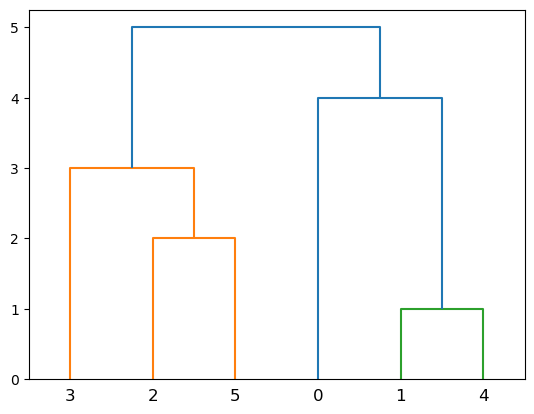

In [62]:
# Массив расстояний (верхний треугольник расстояний разложенный в массив)
a = pdist(X_matr, lambda u, v: f_smc(u, v))

# Библиотечный рассчет метода полной связи для получения нужной матрицы
Z = hierarchy.linkage(a, 'complete')

# запись значения y для дендрограммы
for i, elem in enumerate(Z):
    elem[2] = i + 1

# Вывод дендрограммы
plt.figure()
dn = hierarchy.dendrogram(Z)


### Пункт 3.3

In [63]:
# Количество элементов в кластерах
count_cluster = [1] * len(X_matr)

# Функция для метода средней связи
# u, v - расстояния между кластерами
# elem_1, elem_2 - Номера кластеров, которые объединяются в один
# return:
# float - полученное расстояние между объединенным кластером и другим кластером
def average(u, v, elem_1, elem_2):
    return (u * count_cluster[elem_1] + v * count_cluster[elem_2]) / \
           (count_cluster[elem_1] + count_cluster[elem_2])

# Функция для изменения количества элементов в кластерах
# elem_1, elem_2 - Номера кластеров, которые объединяются в один
def recalc_count(elem_1, elem_2):
    # Количество элементов в объединенном кластере
    count_cluster[elem_1] += count_cluster[elem_2]
    # Удаление лишнего кластера
    count_cluster.pop(elem_2)
    
# Метод средней связи с метрикой JC
Agglomerative(X_matr, f_jc, average, recalc_count, "average")

1 4
Кластеры:
[[0], [1, 4], [2], [3], [5]]
Матрица расстояний для кластеров:
[0.0, 0.5, 0.6, 1.0, 0.8]
[0.5, 0.16666666666666669, 0.7083333333333334, 1.0, 1.0]
[0.6, 0.7083333333333334, 0.0, 1.0, 0.5]
[1.0, 1.0, 1.0, 0.0, 1.0]
[0.8, 1.0, 0.5, 1.0, 0.0]

0 1
Кластеры:
[[0, 1, 4], [2], [3], [5]]
Матрица расстояний для кластеров:
[0.3333333333333333, 0.6722222222222222, 1.0, 0.9333333333333332]
[0.6722222222222222, 0.0, 1.0, 0.5]
[1.0, 1.0, 0.0, 1.0]
[0.9333333333333332, 0.5, 1.0, 0.0]

1 3
Кластеры:
[[0, 1, 4], [2, 5], [3]]
Матрица расстояний для кластеров:
[0.3333333333333333, 0.8027777777777777, 1.0]
[0.8027777777777777, 0.25, 1.0]
[1.0, 1.0, 0.0]

0 1
Кластеры:
[[0, 1, 2, 4, 5], [3]]
Матрица расстояний для кластеров:
[0.5211111111111111, 1.0]
[1.0, 0.0]

0 1
Кластеры:
[[0, 1, 2, 3, 4, 5]]
Матрица расстояний для кластеров:
[0.6009259259259259]



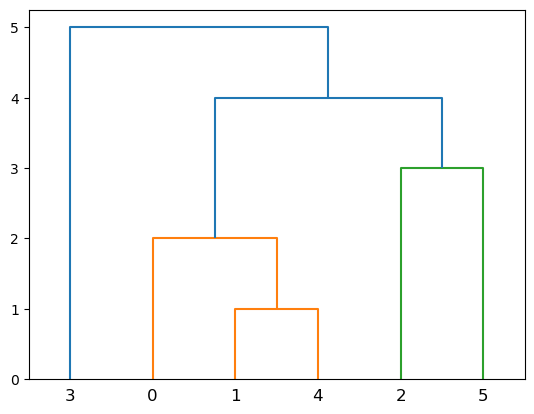

In [64]:
# Массив расстояний (верхний треугольник расстояний разложенный в массив)
a = pdist(X_matr, lambda u, v: f_jc(u, v))

# Библиотечный рассчет метода средней связи для получения нужной матрицы
Z = hierarchy.linkage(a, 'average')

# запись значения y для дендрограммы
for i, elem in enumerate(Z):
    elem[2] = i + 1

# Вывод дендрограммы    
plt.figure()
dn = hierarchy.dendrogram(Z)

## Задание 4

Дан рисунок:

![plot](n5_7_1.png)

Даны следующие метрики:

- Метрика **1**
$$
L_{N}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n{(x_i-y_i)^2}}
$$
- Метрика **2**
$$
L_{\frac{1}{2}}({\bf x},{\bf y})= (\sum_{i=1}^n{\sqrt {|x_i-y_i|}})^2
$$
- Метрика **3**
$$
L_{max}({\bf x},{\bf y})= \max_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **4**
$$
L_{min}({\bf x},{\bf y})= \min_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **5**
$$
L_{pow}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n2^{i-1}(x_i-y_i)^2}
$$

*Самостоятельно* реализуйте алгоритм **DBSCAN**. В качестве результата выведите список кластеров **C**, базовых точек **O**, граничных точек **B**, выпавших точек (шумов) **N**. Постройте диаграмму рассеяния, на которой будут отображены все точки, отображена их принадлежность кластеру, а также выпавшие точки (вид диаграммы аналогичен диаграмме из задания 1.2)

Выполните кластеризацию и построение диаграмм для следующих параметров алгоритма:

4.1 Метрика **1**, ϵ = **2**, minPts = **2**

4.2 Метрика **2**, ϵ = **4**, minPts = **4**

4.3 Метрика **3**, ϵ = **2**, minPts = **6**

4.4 Метрика **4**, ϵ = **1**, minPts = **5**

4.5 Метрика **5**, ϵ = **3**, minPts = **4**

### Данные

In [22]:
# Данные точки
Points = [(11, 5), (12, 4), (3,  8), (11, 3), (17, 7), (4,  9), (12, 6), (12, 3), (1,  9), (15, 7), 
          (8,  1), (2, 10), (19, 5), (3,  9), (7,  7), (3, 10), (8,  2), (12, 1), (17, 2), (11, 1),
          (18, 4), (9,  1), (5, 10), (11, 4), (13, 2)]

### Функции для выполнения задания

In [23]:
# Функция для рассчета метрики
# x, y - точки
# return:
# float - расстояние между точками
def metric_1(x, y):
    return ((x[0] - y[0])**2 + (x[1] - y[1])**2)**(1/2)

# Функция для рассчета метрики
# x, y - точки
# return:
# float - расстояние между точками
def metric_2(x, y):
    return ((abs(x[0] - y[0]))**(1/2) + (abs(x[1] - y[1]))**(1/2))**(2)

# Функция для рассчета метрики
# x, y - точки
# return:
# float - расстояние между точками
def metric_3(x, y):
    return max(abs(x[0] - y[0]),  abs(x[1] - y[1]))

# Функция для рассчета метрики
# x, y - точки
# return:
# float - расстояние между точками
def metric_4(x, y):
    return min(abs(x[0] - y[0]),  abs(x[1] - y[1]))

# Функция для рассчета метрики
# x, y - точки
# return:
# float - расстояние между точками
def metric_5(x, y):
    return ((x[0] - y[0])**2 + 2 * (x[1] - y[1])**2)**(1/2)

# Функция для добавление точек из эпсилон окресности в кластер
# N_epsil - список точек принадлежащих конкретной точке в эпсилон окрестности
# id_clust - список с id кластерами для каждой точки
# Core - список базовых точек
# num_point - номер текущаей точки
# k - номер кластера
def density_connect(N_epsil, id_clust, Core, num_point, k):
    # проход по эпсилон окрестности точки
    for i in N_epsil[num_point]:
        # Если заходили в эту точку выполняем следующий шаг цикла
        if id_clust[i] != -1:
            continue
        # i точка к k кластеру
        id_clust[i] = k
        # Если i точка базовая. то запускаем рекурсию
        if Core.count(i) > 0:
            density_connect(N_epsil, id_clust, Core, i, k)

# Функция для работы алгоритма DBScan
# points - набор всех точек
# metric - функция для подсчета расстояния между 2 точками
# minPts - сколько точек должно быть минимально в эпсилон окрестности, чтобы считать её базовой
# epsilon - размер эпсилон окрестности
# return:
# list(list(int)) - Список кластеров содержащие индексы точек  
# list() - базовые точки
# list() - граничные точки
# list() - шумовые точки
def dbscan(points, metric, minPts, epsilon):
    # Инициализация базовых точек
    Core = []
     # Инициализация кластеров
    clustersWithId = []
    # Инициализация список точек принадлежащих конкретной точке в эпсилон окрестности
    N_epsil = [[] for i in range(len(points))]
    # Инициализация точек, что они не принадлежат ни одному кластеру
    id_clust = [-1] * len(points)
    
    # Рассчет всех эпселон окрестностей
    for i, point in enumerate(points):
        for j, point_t in enumerate(points):
            if point != point_t:
                if metric(point, point_t) <= epsilon:
                    N_epsil[i].append(j)
        
        # Если количество точек превышает minPts, то добавляем точку к базовым
        if len(N_epsil[i]) >= minPts:
            Core.append(i)
    
    print("Эпсилон окрестности:")
    for i, elem in enumerate(N_epsil):
        print("Для точки", i, ":", elem)
    
    k = -1
    # Цикл по базовым точкам и добавления их в кластеры
    for i in Core:
        # Если были в этой точке, то пропускаем
        if id_clust[i] != -1:
            continue
        k += 1
        # Присваеиваем этой точке номер кластера
        id_clust[i] = k
        # Запускаем добавление точек в кластеры, по эпсилон окрестности 
        density_connect(N_epsil, id_clust, Core, i, k)
    
    # Разбитие на кластеры содержащие индексы точек  
    clustersWithId = [[id_point for id_point, elem in enumerate(id_clust) if elem == i] for i in range(k + 1)]
    # Поиск шумов
    Noise = [i for i, elem in enumerate(id_clust) if elem == -1]
    # Поиск граничных точек
    Border = [i for i, elem in enumerate(id_clust) if elem != -1 and Core.count(i) == 0]
    
    return clustersWithId, Core, Border, Noise


# Функция для вывода диаграммы рассеивания для алгоритма DBSCAN
# Звездочками помечаются шумы
# points - набор всех точек
# clustersWithId - разбитие на кластеры содержащие индексы точек
# noise - "шумные" точки
def diogramma_db(points, clustersWithId, noise):
    # Вывод точек на график
    for i, cluster in enumerate(clustersWithId):
        x_val  = [points[idc][0] for idc in cluster]
        y_val  = [points[idc][1] for idc in cluster]

        plt.scatter(x_val, y_val)
    
    # Вывод шумов
    x_val  = [points[idc][0] for idc in noise]
    y_val  = [points[idc][1] for idc in noise]
    plt.scatter(x_val, y_val, c = 'black', marker = '*')
    
    # Нумеруем каждую точку на диаграмме
    cnt = 0
    for x, y in points:
        plt.text(x, y, cnt)
        cnt = cnt + 1
    # Добавление сетки    
    plt.grid()
    # Подпись осей
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

### Пункт 4.1

Эпсилон окрестности:
Для точки 0 : [1, 3, 6, 23]
Для точки 1 : [0, 3, 6, 7, 23]
Для точки 2 : [5, 13, 15]
Для точки 3 : [0, 1, 7, 19, 23]
Для точки 4 : [9]
Для точки 5 : [2, 13, 15, 22]
Для точки 6 : [0, 1]
Для точки 7 : [1, 3, 17, 23, 24]
Для точки 8 : [11, 13]
Для точки 9 : [4]
Для точки 10 : [16, 21]
Для точки 11 : [8, 13, 15]
Для точки 12 : [20]
Для точки 13 : [2, 5, 8, 11, 15]
Для точки 14 : []
Для точки 15 : [2, 5, 11, 13, 22]
Для точки 16 : [10, 21]
Для точки 17 : [7, 19, 24]
Для точки 18 : []
Для точки 19 : [3, 17, 21]
Для точки 20 : [12]
Для точки 21 : [10, 16, 19]
Для точки 22 : [5, 15]
Для точки 23 : [0, 1, 3, 7]
Для точки 24 : [7, 17]
Id точек для кластера № 0
[0, 1, 3, 6, 7, 10, 16, 17, 19, 21, 23, 24]
Id точек для кластера № 1
[2, 5, 8, 11, 13, 15, 22]
Базовые точки: [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, 19, 21, 22, 23, 24]
'Шумные' точки: [4, 9, 12, 14, 18, 20]
Граничные точки: []


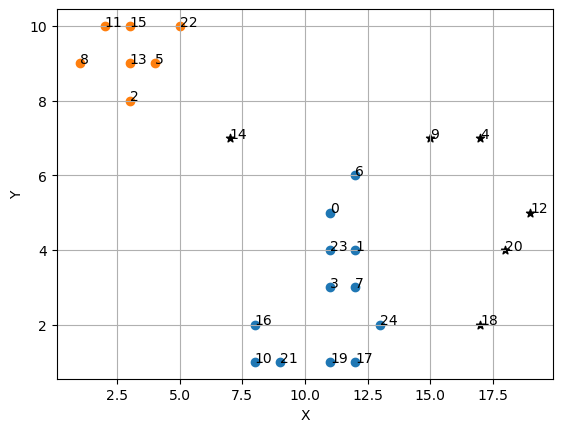

In [24]:
# Использование dbscan для первой метрики с eps = 2 и minpts = 2
clustersWithId, Core, border, noise = dbscan(Points, metric_1, 2, 2)
for i, elem in enumerate(clustersWithId):
    print("Id точек для кластера №", i)
    print(elem)
print("Базовые точки:", Core)
print("'Шумные' точки:", noise)
print("Граничные точки:", border)

# Вывод диаграммы
diogramma_db(Points, clustersWithId, noise)

### Пункт 4.2

Эпсилон окрестности:
Для точки 0 : [3, 23]
Для точки 1 : [6, 7, 17, 23]
Для точки 2 : [13, 15]
Для точки 3 : [0, 7, 19, 23]
Для точки 4 : [9]
Для точки 5 : [8, 13]
Для точки 6 : [1, 7]
Для точки 7 : [1, 3, 6, 17]
Для точки 8 : [5, 13]
Для точки 9 : [4]
Для точки 10 : [16, 19, 21]
Для точки 11 : [15, 22]
Для точки 12 : []
Для точки 13 : [2, 5, 8, 15]
Для точки 14 : []
Для точки 15 : [2, 11, 13, 22]
Для точки 16 : [10]
Для точки 17 : [1, 7, 19, 21]
Для точки 18 : []
Для точки 19 : [3, 10, 17, 21, 23]
Для точки 20 : []
Для точки 21 : [10, 17, 19]
Для точки 22 : [11, 15]
Для точки 23 : [0, 1, 3, 19]
Для точки 24 : []
Id точек для кластера № 0
[0, 1, 3, 6, 7, 10, 17, 19, 21, 23]
Id точек для кластера № 1
[2, 5, 8, 11, 13, 15, 22]
Базовые точки: [1, 3, 7, 13, 15, 17, 19, 23]
'Шумные' точки: [4, 9, 12, 14, 16, 18, 20, 24]
Граничные точки: [0, 2, 5, 6, 8, 10, 11, 21, 22]


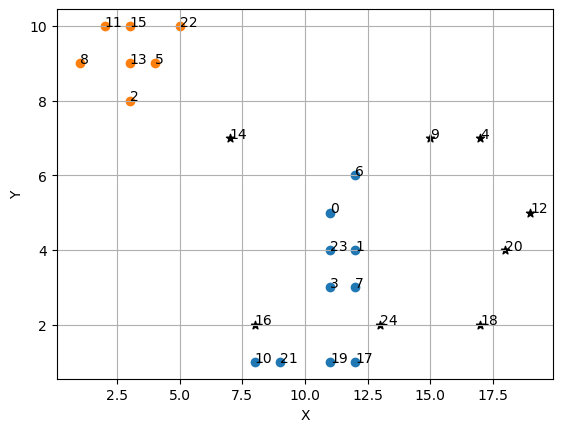

In [25]:
# Использование dbscan для первой метрики с eps = 4 и minpts = 4
# clustersWithId, Core, border, noise = dbscan(Points, metric_2, 4, 4)
clustersWithId, Core, border, noise = dbscan(Points, metric_2, 4, 3)
for i, elem in enumerate(clustersWithId):
    print("Id точек для кластера №", i)
    print(elem)
print("Базовые точки:", Core)
print("'Шумные' точки:", noise)
print("Граничные точки:", border)

# Вывод диаграммы
diogramma_db(Points, clustersWithId, noise)

### Пункт 4.3

Эпсилон окрестности:
Для точки 0 : [1, 3, 6, 7, 23]
Для точки 1 : [0, 3, 6, 7, 23, 24]
Для точки 2 : [5, 8, 11, 13, 15, 22]
Для точки 3 : [0, 1, 7, 17, 19, 21, 23, 24]
Для точки 4 : [9, 12]
Для точки 5 : [2, 11, 13, 15, 22]
Для точки 6 : [0, 1, 23]
Для точки 7 : [0, 1, 3, 17, 19, 23, 24]
Для точки 8 : [2, 11, 13, 15]
Для точки 9 : [4]
Для точки 10 : [16, 21]
Для точки 11 : [2, 5, 8, 13, 15]
Для точки 12 : [4, 20]
Для точки 13 : [2, 5, 8, 11, 15, 22]
Для точки 14 : []
Для точки 15 : [2, 5, 8, 11, 13, 22]
Для точки 16 : [10, 21]
Для точки 17 : [3, 7, 19, 24]
Для точки 18 : [20]
Для точки 19 : [3, 7, 17, 21, 24]
Для точки 20 : [12, 18]
Для точки 21 : [3, 10, 16, 19]
Для точки 22 : [2, 5, 13, 15]
Для точки 23 : [0, 1, 3, 6, 7, 24]
Для точки 24 : [1, 3, 7, 17, 19, 23]
Id точек для кластера № 0
[0, 1, 3, 6, 7, 17, 19, 21, 23, 24]
Id точек для кластера № 1
[2, 5, 8, 11, 13, 15, 22]
Базовые точки: [1, 2, 3, 7, 13, 15, 23, 24]
'Шумные' точки: [4, 9, 10, 12, 14, 16, 18, 20]
Граничные точки: [0, 

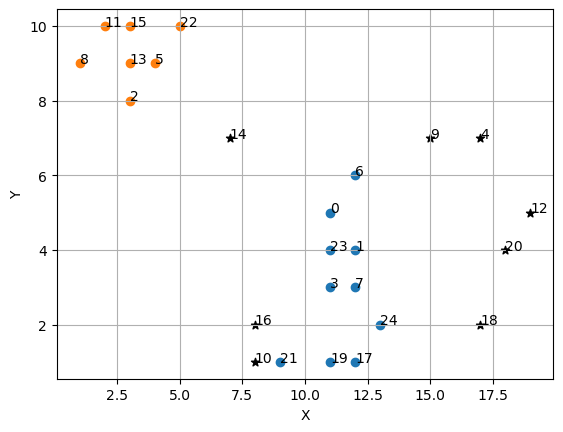

In [26]:
# Использование dbscan для первой метрики с eps = 2 и minpts = 6
clustersWithId, Core, border, noise = dbscan(Points, metric_3, 6, 2)
for i, elem in enumerate(clustersWithId):
    print("Id точек для кластера №", i)
    print(elem)
print("Базовые точки:", Core)
print("'Шумные' точки:", noise)
print("Граничные точки:", border)

# Вывод диаграммы
diogramma_db(Points, clustersWithId, noise)

### Пункт 4.4

Эпсилон окрестности:
Для точки 0 : [1, 3, 6, 7, 12, 17, 19, 20, 23]
Для точки 1 : [0, 3, 6, 7, 12, 17, 19, 20, 23, 24]
Для точки 2 : [4, 5, 8, 9, 11, 13, 14, 15]
Для точки 3 : [0, 1, 6, 7, 16, 17, 18, 19, 20, 23, 24]
Для точки 4 : [2, 6, 9, 14, 18, 20]
Для точки 5 : [2, 8, 11, 13, 15, 22]
Для точки 6 : [0, 1, 3, 4, 7, 9, 12, 14, 17, 19, 23, 24]
Для точки 7 : [0, 1, 3, 6, 16, 17, 18, 19, 20, 23, 24]
Для точки 8 : [2, 5, 11, 13, 15, 22]
Для точки 9 : [2, 4, 6, 14]
Для точки 10 : [14, 16, 17, 18, 19, 21, 24]
Для точки 11 : [2, 5, 8, 13, 15, 22]
Для точки 12 : [0, 1, 6, 20, 23]
Для точки 13 : [2, 5, 8, 11, 15, 22]
Для точки 14 : [2, 4, 6, 9, 10, 16]
Для точки 15 : [2, 5, 8, 11, 13, 22]
Для точки 16 : [3, 7, 10, 14, 17, 18, 19, 21, 24]
Для точки 17 : [0, 1, 3, 6, 7, 10, 16, 18, 19, 21, 23, 24]
Для точки 18 : [3, 4, 7, 10, 16, 17, 19, 20, 21, 24]
Для точки 19 : [0, 1, 3, 6, 7, 10, 16, 17, 18, 21, 23, 24]
Для точки 20 : [0, 1, 3, 4, 7, 12, 18, 23]
Для точки 21 : [10, 16, 17, 18, 19, 24]
Для т

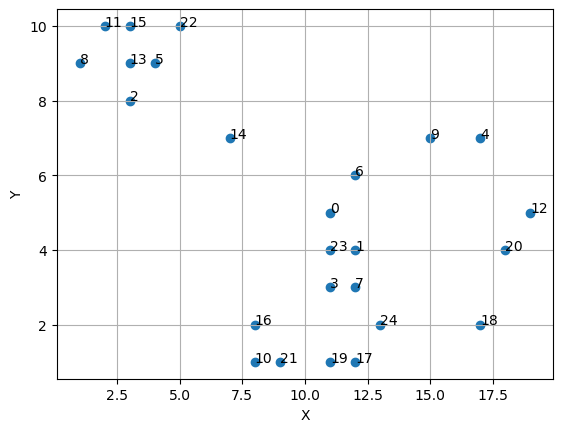

In [27]:
# Использование dbscan для первой метрики с eps = 1 и minpts = 5
clustersWithId, Core, border, noise = dbscan(Points, metric_4, 5, 1)
for i, elem in enumerate(clustersWithId):
    print("Id точек для кластера №", i)
    print(elem)
print("Базовые точки:", Core)
print("'Шумные' точки:", noise)
print("Граничные точки:", border)

# Вывод диаграммы
diogramma_db(Points, clustersWithId, noise)

### Пункт 4.5

Эпсилон окрестности:
Для точки 0 : [1, 3, 6, 7, 23]
Для точки 1 : [0, 3, 6, 7, 23, 24]
Для точки 2 : [5, 8, 11, 13, 15]
Для точки 3 : [0, 1, 7, 17, 19, 23, 24]
Для точки 4 : [9]
Для точки 5 : [2, 8, 11, 13, 15, 22]
Для точки 6 : [0, 1, 23]
Для точки 7 : [0, 1, 3, 17, 19, 23, 24]
Для точки 8 : [2, 5, 11, 13, 15]
Для точки 9 : [4]
Для точки 10 : [16, 19, 21]
Для точки 11 : [2, 5, 8, 13, 15, 22]
Для точки 12 : [20]
Для точки 13 : [2, 5, 8, 11, 15, 22]
Для точки 14 : []
Для точки 15 : [2, 5, 8, 11, 13, 22]
Для точки 16 : [10, 21]
Для точки 17 : [3, 7, 19, 21, 24]
Для точки 18 : [20]
Для точки 19 : [3, 7, 10, 17, 21, 24]
Для точки 20 : [12, 18]
Для точки 21 : [10, 16, 17, 19]
Для точки 22 : [5, 11, 13, 15]
Для точки 23 : [0, 1, 3, 6, 7]
Для точки 24 : [1, 3, 7, 17, 19]
Id точек для кластера № 0
[0, 1, 3, 6, 7, 10, 16, 17, 19, 21, 23, 24]
Id точек для кластера № 1
[2, 5, 8, 11, 13, 15, 22]
Базовые точки: [0, 1, 2, 3, 5, 7, 8, 11, 13, 15, 17, 19, 21, 22, 23, 24]
'Шумные' точки: [4, 9, 12, 14,

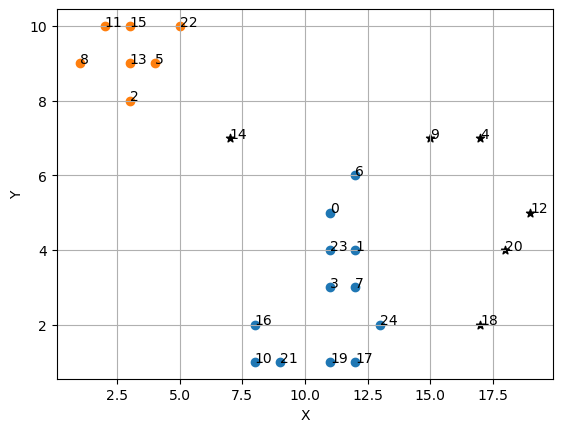

In [28]:
# Использование dbscan для первой метрики с eps = 3 и minpts = 4
clustersWithId, Core, border, noise = dbscan(Points, metric_5, 4, 3)
for i, elem in enumerate(clustersWithId):
    print("Id точек для кластера №", i)
    print(elem)
print("Базовые точки:", Core)
print("'Шумные' точки:", noise)
print("Граничные точки:", border)

# Вывод диаграммы
diogramma_db(Points, clustersWithId, noise)

## Для справки

1. Машинное обучение. Учебное пособие. Темы: 
   - Глава 8. Репрезентативная кластеризация. Алгоритм K-средних. Алгоритм 8.1
   - Глава 8. Оценка максимального правдоподобия. Оценка среднего значения.
   - Глава 9. Иерархическая кластеризация. Агломеративная иерархическая кластеризация. Алгоритм 9.1
   - Глава 10. Кластеризация, основанная на плотности. Алгоритм DBSCAN. Алгоритм 10.1
2. [Sklearn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

3. [Scipy Dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
